<a href="https://colab.research.google.com/github/MudassirABBASSi/Computer-Vision/blob/main/Face_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install mediapipe==0.10.14

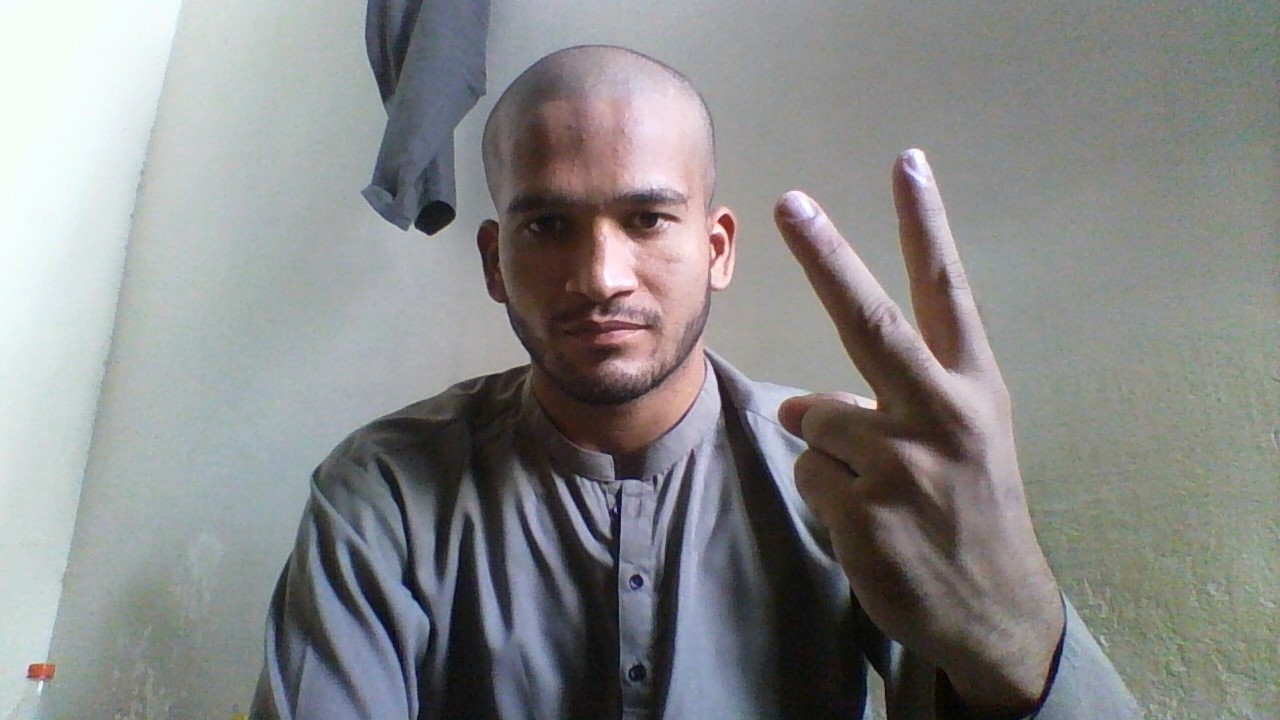

/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


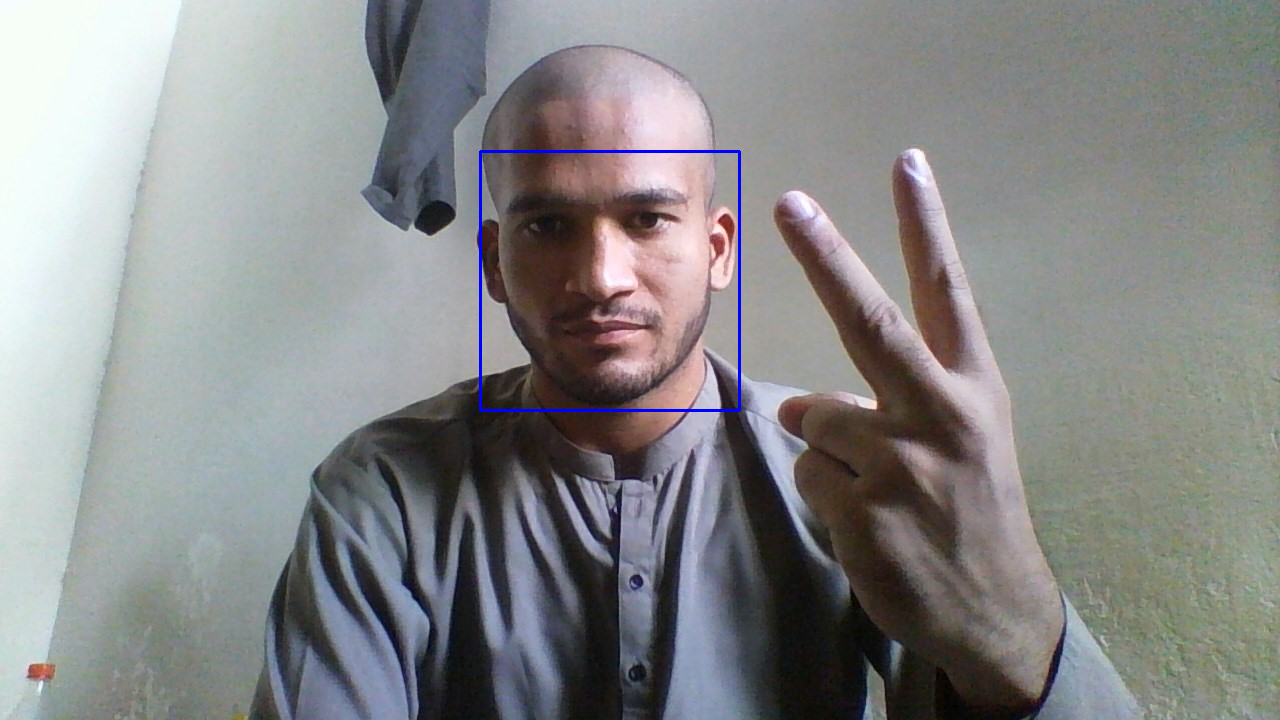

In [10]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

path = "/content/WIN_20230825_13_03_43_Pro.jpg"
img = cv2.imread(path)
cv2_imshow(img)
H, W = img.shape[:2] # Access height and width using indexing
# print(H,W)

mp_face_detection = mp.solutions.face_detection
with mp_face_detection.FaceDetection(model_selection =0,min_detection_confidence=0.5) as face_detection: # Added colon and corrected class name
  img_rgb  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  out = face_detection.process(img_rgb)
  # print(out.detections) # Corrected attribute name


  if out.detections is not None: # Corrected attribute name
    for detection in out.detections: # Corrected attribute name
      location_data = detection.location_data
      bbox = location_data.relative_bounding_box
      x1,y1,w,h = bbox.xmin,bbox.ymin,bbox.width,bbox.height
      x1 = int(x1*W) # Multiplied by W for x-coordinate
      y1 = int(y1*H) # Multiplied by H for y-coordinate
      w = int(w*W)   # Multiplied by W for width
      h = int(h*H)   # Multiplied by H for height
      cv2.rectangle(img,(x1,y1),(x1+w,y1+h),(255,0,0),2)
      cv2_imshow(img)

In [12]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Load MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils  # (Optional: draws landmarks and bbox)

# Path to your uploaded video
video_path = "/content/White Simple Textfields Beauty and Personal Care TikTok Video.mp4"
output_video_path = "/content/output_video.mp4" # Define output path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # You can use other codecs like 'XVID'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))


# Initialize Face Detection
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # stop when video ends

        # Convert BGR (OpenCV format) to RGB (MediaPipe format)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame
        results = face_detection.process(frame_rgb)

        # Draw detections
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                h, w, c = frame.shape
                x1 = int(bboxC.xmin * w)
                y1 = int(bboxC.ymin * h)
                bw = int(bboxC.width * w)
                bh = int(bboxC.height * h)

                # Draw rectangle
                cv2.rectangle(frame, (x1, y1), (x1 + bw, y1 + bh), (255, 0, 0), 2)

        # Write the frame to the output video
        out.write(frame)

        # Remove delay and cv2_imshow (as we are saving now)
        # cv2_imshow(frame)
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break

cap.release()
out.release() # Release the VideoWriter
cv2.destroyAllWindows()

print(f"Processed video saved to {output_video_path}") # Inform the user where the video is saved

Processed video saved to /content/output_video.mp4
